# Regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 

### Polynomial regression

Given the following function of the "ground truth", and a few sample data points we will use for regression. The example is by Mathieu Blondel & Jake Vanderplas ([source](http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)).

In [2]:
func = lambda x: x * np.sin(x) 

In [3]:
np.linspace(0,10,1000)

array([  0.        ,   0.01001001,   0.02002002,   0.03003003,
         0.04004004,   0.05005005,   0.06006006,   0.07007007,
         0.08008008,   0.09009009,   0.1001001 ,   0.11011011,
         0.12012012,   0.13013013,   0.14014014,   0.15015015,
         0.16016016,   0.17017017,   0.18018018,   0.19019019,
         0.2002002 ,   0.21021021,   0.22022022,   0.23023023,
         0.24024024,   0.25025025,   0.26026026,   0.27027027,
         0.28028028,   0.29029029,   0.3003003 ,   0.31031031,
         0.32032032,   0.33033033,   0.34034034,   0.35035035,
         0.36036036,   0.37037037,   0.38038038,   0.39039039,
         0.4004004 ,   0.41041041,   0.42042042,   0.43043043,
         0.44044044,   0.45045045,   0.46046046,   0.47047047,
         0.48048048,   0.49049049,   0.5005005 ,   0.51051051,
         0.52052052,   0.53053053,   0.54054054,   0.55055055,
         0.56056056,   0.57057057,   0.58058058,   0.59059059,
         0.6006006 ,   0.61061061,   0.62062062,   0.63

In [4]:
N, n = 1000, 10
domain = np.linspace(0, 10, N)
x_sample = np.sort(np.random.choice(domain, n))
y_sample = func(x_sample) 

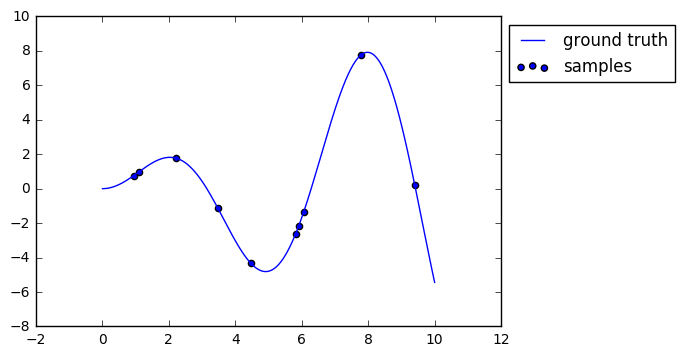

In [5]:
f = plt.plot(domain, func(domain), label="ground truth")
f = plt.scatter(x_sample, func(x_sample), label="samples")
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

Obviously linear regression won't bring you far:

R2 = 0.012912889881


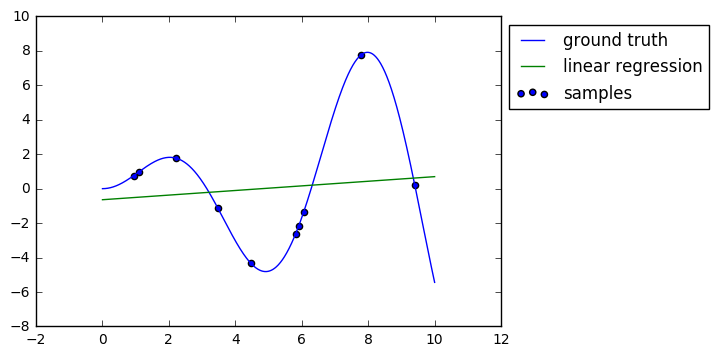

In [6]:
X = np.array([x_sample]).T
model = LinearRegression().fit(X, y_sample)
print "R2 =", model.score(X, y_sample)
f = plt.plot(domain, func(domain), label="ground truth")
f = plt.scatter(x_sample, func(x_sample), label="samples")
f = plt.plot([0, 10], [model.intercept_, model.intercept_ + 10 * model.coef_[0]], label="linear regression")
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1)) 

Now try a few polynomial regressions to fit the given sample data points.

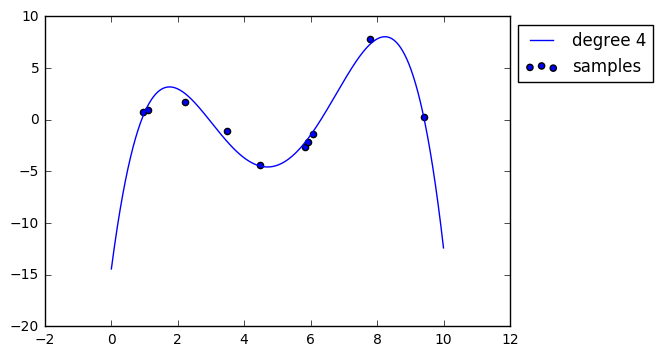

In [7]:
X = np.array([x_sample]).T
# f = plt.plot(x, func(x), label="ground truth", alpha=.4)
f = plt.scatter(x_sample, func(x_sample), label="samples")

degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y_sample)
y_pred = model.predict(np.array([domain]).T)
plt.plot(domain, y_pred, label="degree %d" % degree)

f = plt.legend(loc="upper left", bbox_to_anchor=(1,1)) 

- It's actually a result from algebra that you can fit *any* finite set of data points with a polynomial. 
- In fact, for any set of $n$ data points, there exists a polynomial of degree $n$ that goes right through them.
- This is great if you'd want to approximate your data arbitrarily closely.
- It's not great if you're afraid of overfitting your data

### Overfitting

Suppose you want to find a model behind some data, which also contains some arbitrary noise.

In [8]:
func = lambda x: 1 + .1 * (x - 4) ** 2 + 4 * np.random.random(len(x))

In [9]:
N, n = 1000, 30
domain = np.linspace(0, 15, N)
x_sample = np.linspace(0, 15, n)
y_sample = func(x_sample)

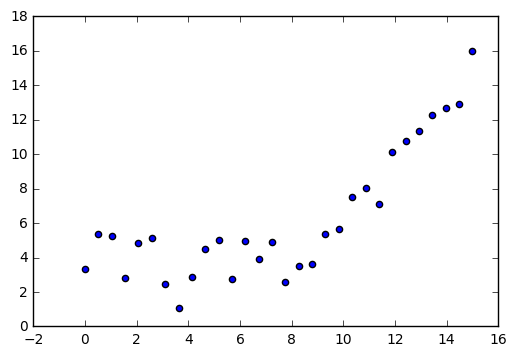

In [10]:
f = plt.scatter(x_sample, func(x_sample))

Obviously you could fit this noise by an arbitrarily complex model.

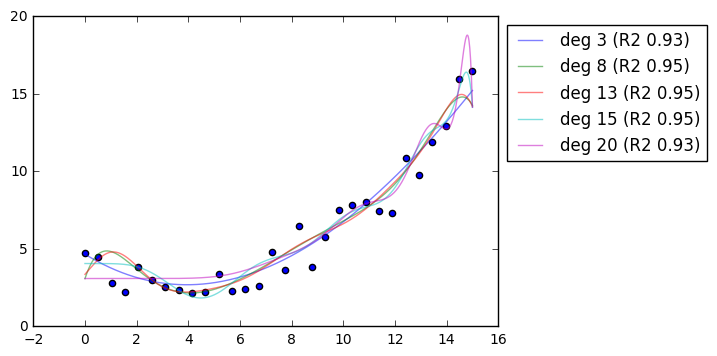

In [15]:
X = np.array([x_sample]).T
f = plt.scatter(x_sample, func(x_sample))

for degree in [3, 8, 13, 15, 20]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y_sample)
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y_sample)))

f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

It makes sense that that is obviously not what you want.

For degree 1 , R2 = 0.589572312228
For degree 2 , R2 = 0.848267299029
For degree 3 , R2 = 0.879393269316
For degree 4 , R2 = 0.82373362224
For degree 5 , R2 = 0.806882585678


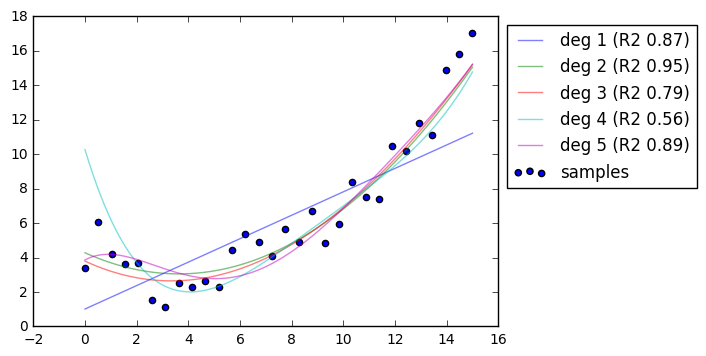

In [16]:
f = plt.scatter(x_sample, func(x_sample), label="samples")
for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # Compute a few R2 scores and print average performance
    scores = []
    for k in xrange(15):
        X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
        scores.append(model.fit(X_train, y_train).score(X_test, y_test))
    print "For degree", degree, ", R2 =", np.mean(scores)
    # Take last model to plot predictions
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X_test, y_test)))

    f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

It seems that a second or third degree polynomial performs better than a fifth one on unseen data, which makes sense, since that's how we generated the samples.

Let's compare the different models once more:

In [20]:
def analyze_performance(test_model): #calling function analyze_performance with one condition test_model
    scores = {'overfit': {}, 'cv': {}} #making a dictionary that are empty; within the loop dict gains info
    for degree in xrange(0, 30):
        model = make_pipeline(PolynomialFeatures(degree), test_model)    
        scores['overfit'][degree] = model.fit(X, y_sample).score(X, y_sample)
        cv_scores = []
        for k in xrange(15):  # Compute a few R2 scores and print average performance
            X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
            cv_scores.append(model.fit(X_train, y_train).score(X_test, y_test))
        scores['cv'][degree] = np.mean(cv_scores)
    return pd.DataFrame(scores)

print pd.DataFrame(scores)

              cv   overfit
0  -1.116845e-01  0.000000
1   5.621465e-01  0.706891
2   8.832776e-01  0.927937
3   8.617461e-01  0.928781
4   8.218641e-01  0.929562
5   7.442224e-01  0.931828
6   7.836087e-01  0.947676
7  -9.494475e-01  0.947789
8   5.091875e-01  0.948787
9   6.755677e-01  0.948832
10  9.787117e-02  0.948861
11 -6.361836e+00  0.949585
12 -6.336483e+00  0.949589
13 -3.056854e+01  0.947922
14 -1.111322e+03  0.945695
15 -8.789641e+02  0.948304
16 -2.496241e+00  0.950472
17 -3.572601e+04  0.927871
18 -1.239514e+02  0.929044
19 -3.535448e+06  0.930974
20 -6.458112e+04  0.932521
21 -8.743070e+02  0.933184
22 -6.984950e+02  0.933079
23 -1.110535e+06  0.928797
24 -3.039793e+02  0.928184
25 -1.255906e+07  0.927396
26 -4.761067e+08  0.926452
27 -1.850124e+07  0.925340
28 -2.459400e+09  0.924034
29 -1.039093e+08  0.922492


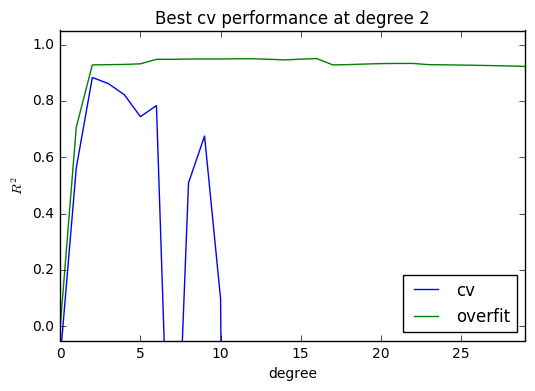

In [18]:
scores = analyze_performance(LinearRegression())
f = scores.plot(ylim=(-.05,1.05))
f = plt.title("Best cv performance at degree %d" % scores.cv.argmax()), plt.xlabel('degree'), plt.ylabel('$R^2$')

### Regularization

If your model is very complex (i.e., lots of features, possibly a polynomial fit, etc.), you need to worry more about overfitting.
- You'll need regularization when your model is complex, which happens when you have little data or many features.
- The example below uses the same dataset as above, but with fewer samples, and a relatively high degree model.
- We'll fit the (unregularized) `LinearRegression`, as well as the (regularized) `Ridge` and `Lasso` model.
  - Lasso regression imposes an L1 prior on the coefficient, causing many coeffiecients to be zero.
  - Ridge regression imposes an L2 prior on the coefficient, causing outliers to be less likely, and coeffiecients to be small across the board.

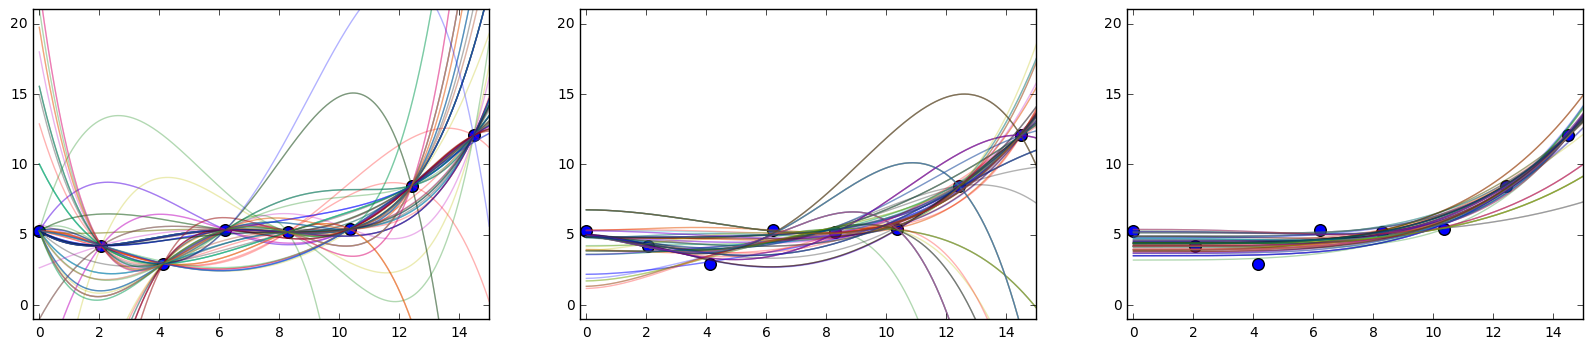

In [23]:
x_small_sample = x_sample[::4]
y_small_sample = func(x_small_sample)

degree, alpha = 4, 10

X = np.array([x_small_sample]).T
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for no, my_model in enumerate([LinearRegression(), Ridge(alpha=alpha), Lasso(alpha=alpha)]):    
    model = make_pipeline(PolynomialFeatures(degree), my_model)    
    r2, MSE = [], []
    for k in xrange(100):  # Fit a few times the model to different training sets
        X_train, X_test, y_train, y_test = train_test_split(X, y_small_sample, train_size=.7)
        r2.append(model.fit(X_train, y_train).score(X_test, y_test))
        y_pred = model.predict(np.array([domain]).T)
        axes[no].plot(domain, y_pred, alpha=.3)
        y_pred_sample = model.predict(np.array([x_small_sample]).T)
        MSE.append(np.square(y_pred_sample - y_small_sample).sum())
    axes[no].scatter(x_small_sample, y_small_sample, s=70)
    #axes[no].set_title("%s (R2 %.2f, MSE %3d)" % (my_model.__class__.__name__, np.mean(scores), np.mean(MSE)))
    axes[no].set_xlim(-.2, max(domain)), axes[no].set_ylim(-1, 21)

- Indeed, the unregularized `LinearRegression` leads to a model that is too complex and tries to fit the noise. 
- Note the differences in the (averaged) mean square error, or MSE, as well the complexity in the plots
- Note that the $R^2$ metric is not helpful here.

#### Increasing complexity

Let's try a few degrees with a regularized model.

In [24]:
test_models = [LinearRegression(), Ridge(alpha=10), Lasso(alpha=10)]

scores = [analyze_performance(my_model) for my_model in test_models]

ValueError: Found arrays with inconsistent numbers of samples: [ 8 30]

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for no, score in enumerate(scores):
    s, name = pd.DataFrame(score), test_models[no].__class__.__name__
    f = s.plot(ylim=(-.05,1.05), ax=axes[no], legend=False)
    f = axes[no].set_title("%s\nBest cv performance at degree %d" % (name, s.cv.argmax()))
    f = axes[no].set_xlabel('degree'), axes[no].set_ylabel('$R^2$')

We could try a few different values for $\alpha$ as well.

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))
for col, alpha in enumerate([0, 1, 10, 100]):
    scores = [analyze_performance(my_model) for my_model in [Ridge(alpha=alpha), Lasso(alpha=alpha)]]
    for row, score in enumerate(scores):
        s, name = pd.DataFrame(score), test_models[row].__class__.__name__
        f = s.plot(ylim=(-.05,1.05), ax=axes[row, col], legend=False)
        f = axes[row, col].set_title("%s (alpha %d)\nBest cv at degree %d" % (name, alpha, s.cv.argmax()))
        f = axes[row, col].set_xlabel('degree'), axes[row, col].set_ylabel('$R^2$')
f = plt.tight_layout()

We see that that Ridge and Lasso keep performing well for higher degrees, because of their regularization.



<hr>

## Exercises

(Not verified yet.)

Take a dataset from the previous Linear Regression notebook (eg Princeton salaries or Boston house prices) and try to repeat the exercises using regularization.


```Python
from sklearn import linear_model

model = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
model.fit(X,y)

print model.coef_
print model.alpha_
```

### Additional Resources
- [Linear Regression with Python](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)
- [Statsmodels Documentation](http://statsmodels.sourceforge.net/stable/index.html)
- [Python 538 Model](https://github.com/jseabold/538model)
